<a href="https://colab.research.google.com/github/AndrewSundaram/VU_SmartCities/blob/master/EnergyWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Setup

In [1]:
!git clone https://github.com/univ-3360-vu-smartcities/AlumniHallDataAnalysis.git
!mkdir data

Cloning into 'AlumniHallDataAnalysis'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 80 (delta 45), reused 67 (delta 32), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [2]:
cd AlumniHallDataAnalysis

/content/AlumniHallDataAnalysis


In [0]:
!mkdir data

In [4]:
!pip install -r requirements.txt
!pip install -U ipykernel  # To prevent notebook from crashing in Colab

     |████████████████████████████████| 9.0MB 2.8MB/s 
     |████████████████████████████████| 25.2MB 1.4MB/s 
     |████████████████████████████████| 17.4MB 246kB/s 
     |████████████████████████████████| 10.5MB 36.0MB/s 
     |████████████████████████████████| 13.1MB 200kB/s 
     |████████████████████████████████| 501kB 55.4MB/s 
     |████████████████████████████████| 604kB 44.8MB/s 
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427635 sha256=96a18f60fff8503c9a79318f4ba249e54200dbbaa559e0f3415a461fa7bb68d2
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=9c89ebfe39efe0002edaef6eb50bd98c9c8c8db5ea51c732ef4b88c72b1b7e96
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built tornado locket
ERROR: tensorflow 2.2.0rc1 has requirement sci

     |████████████████████████████████| 122kB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.6.0, but you'll have ipykernel 5.2.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement notebook~=5.2.0, but you'll have notebook 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=4.5.0, but you'll have tornado 6.0.4 which is incompatible.
  Found existing installation: ipykernel 4.6.1
    Uninstalling ipykernel-4.6.1:
      Successfully uninstalled ipykernel-4.6.1


In [0]:
# helper module to load the Alumni Hall data and process it
from datautils import dataprocessor as dp

## Occupancy Data Import

In [7]:
# load data path
df = dp.readfile('./data/occupancyStatus.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe. 
# Note: order of operations are important. For example we cannot parse datetime from the data before converting it
# from file to dataframe(file2df)
processmethods = ['file2df', 'datetime_parse_df']
df = df.return_df(processmethods=processmethods)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


In [0]:
# Drop Columns where more than 5% of values are NaN
df = dp.dropNaNcols(df, threshold = 0.95)

# Drop entire rows with NaN cells
df = dp.dropNaNrows(df)

In [9]:
df.head()

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,WRITING_STUDIO_113_Indoor_Unit_20.occupancyStatus,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-13 07:50:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,unoccupied,occupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,occupied,occupied,occu

In [0]:
# Pandas infers nominal data as object data type. Convert all columns to categorical data type
df[df.columns] = df[df.columns].astype('category')

# Convert the categorical data to numerical data eg occupied -> 0, unoccupied -> 1. Tthis will be useful for objective
# analysis
df[df.columns] = df[df.columns].apply(lambda x: x.cat.codes)

# sort dataframe columns alphabetically if needed
#df = df.reindex(sorted(df.columns), axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

Finished 'dataframeplot' in 0.6661 secs


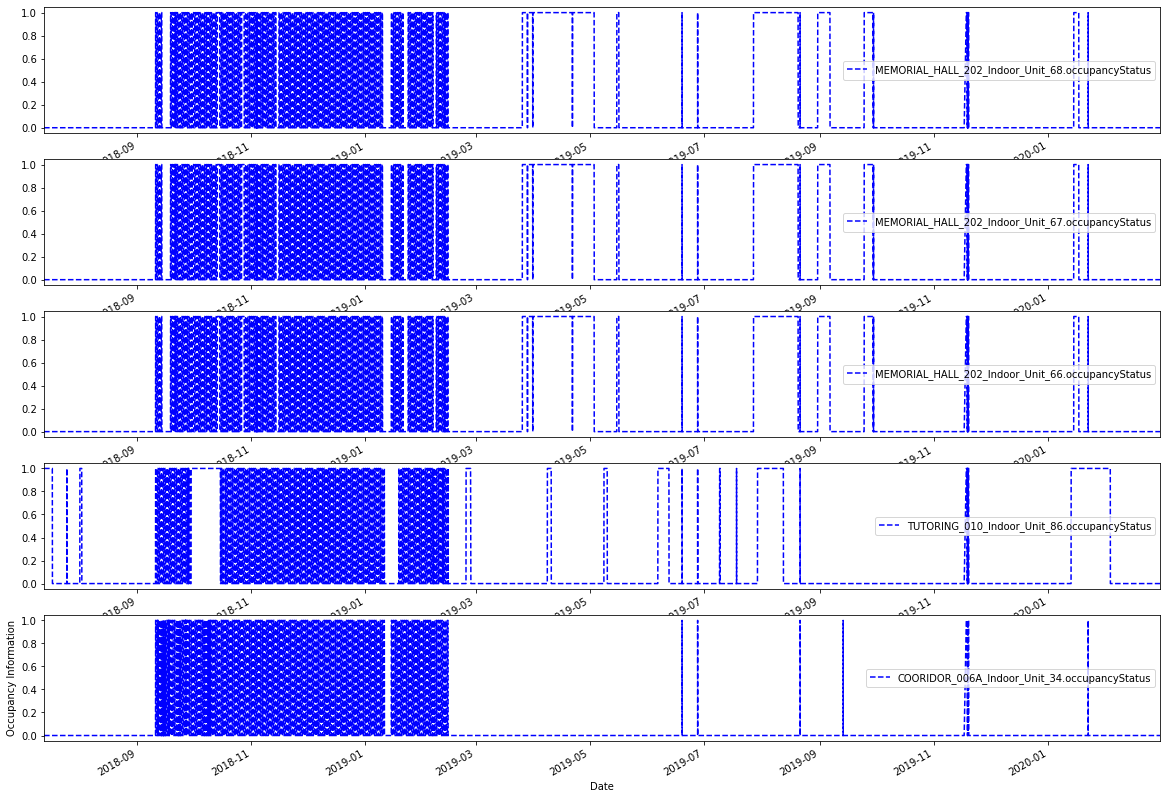

In [0]:
# plot the first 5 columns
start = 0
end = 5
dp.dataframeplot(df[df.columns[start:end]], style='-', xlabel='Date',
                 ylabel='Occupancy Information', lazy=False, legend=True)

Slicing Occupancy Data

In [17]:
# We want to look at data from 12th of July 9:17 am to 12th of July 01:23 pm
# We slice the data frame to look at the above mentioned date range using the command below
df_newOcc = df[(df.index >= '2019-07-12 09:17:00') & (df.index <= '2019-07-12 13:23:00')]
# look at the newly created dataframe after slicing
df_newOcc.head(50)

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,OFFICE_115_Indoor_Unit_80.occupancyStatus,READING_ROOM_206_Indoor_Unit_93.occupancyStatus,STORAGE_014_Indoor_Unit_110.occupancyStatus,OFFICE_115_Indoor_Unit_77.occupancyStatus,ELEV_MACH_008_Indoor_Unit_39.occupancyStatus,UTILITY_004_Indoor_Unit_16.occupancyStatus,TUTORING_010_Indoor_Unit_10.occupancyStatus,TUTORING_010_Indoor_Unit_12.occupancyStatus,MEETING_117B_Indoor_Unit_19.occupancyStatus,MEETING_117A_Indoor_Unit_63.occupancyStatus,RECEIVING_109_Indoor_Unit_59.occupancyStatus,READING_ROOM_206_Indoor_Unit_92.occupancyStatus,TUTORING_010_Indoor_Unit_11.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_21.occupancyStatus,OFFICE_303_Indoor_Unit_102.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_97.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_98.occupancyStatus,LOBBY_111_Indoor_Unit_57.occupancyStatus,READING_ROOM_206_INDOR_UNIT_96.occupancyStatus,GENT_RR_016_Indoor_Unit_15.occupancyStatus,LOBBY_003_Indoor_Unit_13.occupancyStatus,CORRIDOR_108_Indoor_Unit_60.occupancyStatus,CORRIDOR_203_Indoor_Unit_64.occupancyStatus,CORRIDOR_309_Indoor_Unit_25.occupancyStatus,LOBBY_200_Indoor_Unit_79.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_99.occupancyStatus,OFFICE_304_Indoor_Unit_101.occupancyStatus,COORIDOR_006_Indoor_Unit_37.occupancyStatus,OFFICE_301_Indoor_Unit_104.occupancyStatus,CORRIDOR_310_Indoor_Unit_69.occupancyStatus,...,WRITING_STUDIO_113_Indoor_Unit_20.occupancyStatus,STAFF_KITCH_018_Indoor_Unit_113.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_76.occupancyStatus,MECH_ROOM_400_Indoor_Unit_106.occupancyStatus,MECH_ROOM_401_Indoor_Unit_112.occupancyStatus,READING_ROOM_206_Indoor_Unit_108.occupancyStatus,OFFICE_114_Indoor_Unit_78.occupancyStatus,STORAGE_001_Indoor_Unit_49.occupancyStatus,CORRIDOR_310_Indoor_Unit_72.occupancyStatus,CORRIDOR_013_Indoor_Unit_111.occupancyStatus,LOBBY_204_Indoor_Unit_65.occupancyStatus,CLASS_ROOM_201_Indoor_Unit_100.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_83.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_86.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_87.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_84.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_85.occupancyStatus,WOMEN_RR_011_Indoor_Unit_38.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_82.occupancyStatus,CAFE_103_Indoor_Unit_55.occupancyStatus,READING_ROOM_206_Indoor_Unit_91.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_88.occupancyStatus,OFFICE_305_Indoor_Unit_74.occupancyStatus,LOBBY_300_Indoor_Unit_103.occupancyStatus,READING_ROOM_206_Indoor_Unit_89.occupancyStatus,CAFE_103_Indoor_Unit_51.occupancyStatus,ELEC_ROOM_005_Indoor_Unit_18.occupancyStatus,CAFE_103_Indoor_Unit_54.occupancyStatus,CAFE_103_Indoor_Unit_52.occupancyStatus,LOBBY_101_Indoor_Unit_48.occupancyStatus,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-12 09:20:00,occupied,occupied,occupied,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied,occupied,unoccupied,occupied,occupied,occupied,occupied,occup

## Energy Data Import

In [10]:
# load data path
energy_data = dp.readfile('./data/AH_Energy_Meter.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['file2df', 'datetime_parse_df']
energy_data = energy_data.return_df(processmethods=processmethods)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys


In [0]:
# Drop Columns where more than X% of values are NaN
x = 8
energy_data = dp.dropNaNcols(energy_data, threshold = 1-(x/100))

# Drop entire rows with NaN cells
energy_data = dp.dropNaNrows(energy_data)

Slicing Eenrgy Data

In [13]:
# Let us look at the 1st 50 rows of the data
energy_data.head(50)

,ElectricMeterProfile.currentKbtuDeltaReading,ElectricMeterProfile.currentResourceDeltaReading,ElectricMeterProfile.meterInput,ElectricMeterProfile.meterStale,ElectricMeterProfile.originalKbtuDeltaReading,ElectricMeterProfile.originalResourceDeltaReading,ElectricMeterProfile.peak,ElectricMeterProfile.realPowerDemand,Total_KBTU_METER.currentKbtuDeltaReading,Total_KBTU_METER.currentResourceDeltaReading,Total_KBTU_METER.currentTimeDeltaReading,Total_KBTU_METER.meterInput,Total_KBTU_METER.meterStale,Total_KBTU_METER.originalKbtuDeltaReading,Total_KBTU_METER.originalResourceDeltaReading,CHW_BTU_METER.currentKbtuDeltaReading,CHW_BTU_METER.currentResourceDeltaReading,CHW_BTU_METER.currentTimeDeltaReading,CHW_BTU_METER.meterInput,CHW_BTU_METER.meterStale,CHW_BTU_METER.originalKbtuDeltaReading,CHW_BTU_METER.originalResourceDeltaReading,STM_BTU_METER.currentKbtuDeltaReading,STM_BTU_METER.currentResourceDeltaReading,STM_BTU_METER.meterInput,STM_BTU_METER.meterStale,STM_BTU_METER.originalKbtuDeltaReading,STM_BTU_METER.originalResourceDeltaReading,HW_BTU_METER.currentKbtuDeltaReading,HW_BTU_METER.currentResourceDeltaReading,HW_BTU_METER.meterInput,HW_BTU_METER.meterStale,HW_BTU_METER.originalKbtuDeltaReading,HW_BTU_METER.originalResourceDeltaReading
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-12 08:55:00,41.211020,12.07776,2066787.6,False,41.211020,12.07776,True,48.31104,76.967860,76.967860,301301.0,9662125.0,False,76.967860,76.967860,35.590466,35.590466,300309.0,2484930.0,False,35.590466,35.590466,0.166374,0.166374,125024.48,False,0.166374,0.166374,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:00:00,0.000000,0.00000,2066787.6,False,0.000000,0.00000,True,48.31104,33.198483,33.198483,299958.0,9662158.0,False,33.198483,33.198483,33.027813,33.027813,300950.0,2484963.0,False,33.027813,33.027813,0.166496,0.166496,125024.66,False,0.166496,0.166496,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:05:00,0.000000,0.00000,2066787.6,False,0.000000,0.00000,True,48.31104,31.936079,31.936079,300907.0,9662190.0,False,31.936079,31.936079,31.769627,31.769627,300907.0,2484994.8,False,31.769627,31.769627,0.166452,0.166452,125024.82,False,0.166452,0.166452,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:10:00,46.951607,13.76016,2066801.4,False,46.951607,13.76016,True,55.04064,81.313710,81.313710,299895.0,9662272.0,False,81.313710,81.313710,34.195640,34.195640,299895.0,2485029.0,False,34.195640,34.195640,0.166468,0.166468,125024.98,False,0.166468,0.166468,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:15:00,0.000000,0.00000,2066801.4,False,0.000000,0.00000,True,55.04064,31.248718,31.248718,301147.0,9662303.0,False,31.248718,31.248718,31.082222,31.082222,301147.0,2485060.2,False,31.082222,31.082222,0.166496,0.166496,125025.16,False,0.166496,0.166496,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:20:00,0.000000,0.00000,2066801.4,False,0.000000,0.00000,True,55.04064,28.415644,28.415644,293763.0,9662331.0,False,28.415644,28.415644,28.254465,28.254465,293763.0,2485088.5,False,28.254465,28.254465,0.161179,0.161179,125025.31,False,0.161179,0.161179,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:25:00,42.418920,12.43176,2066813.8,False,42.418920,12.43176,True,49.72704,72.058310,72.058310,297973.0,9662403.0,False,72.058310,72.058310,29.472635,29.472635,297973.0,2485117.8,False,29.472635,29.472635,0.166762,0.166762,125025.48,False,0.166762,0.166762,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:30:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,32.454205,32.454205,301640.0,9662436.0,False,32.454205,32.454205,32.287254,32.287254,301639.0,2485150.2,False,32.287254,32.287254,0.166950,0.166950,125025.65,False,0.166950,0.166950,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:35:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,38.913044,38.913044,301118.0,9662475.0,False,38.913044,38.913044,38.746120,38.746120,301119.0,2485189.0,False,38.746120,38.746120,0.166923,0.166923,125025.81,False,0.166923,0.166923,0.0,0.0,0.0,False,0.0,0.0


In [14]:
# We want to look at data from 12th of July 9:17 am to 12th of July 01:23 pm
# We slice the data frame to look at the above mentioned date range using the command below
df_new = energy_data[(energy_data.index >= '2018-07-12 09:17:00') & (energy_data.index <= '2018-07-12 13:23:00')]
# look at the newly created dataframe after slicing
df_new.head(50)

,ElectricMeterProfile.currentKbtuDeltaReading,ElectricMeterProfile.currentResourceDeltaReading,ElectricMeterProfile.meterInput,ElectricMeterProfile.meterStale,ElectricMeterProfile.originalKbtuDeltaReading,ElectricMeterProfile.originalResourceDeltaReading,ElectricMeterProfile.peak,ElectricMeterProfile.realPowerDemand,Total_KBTU_METER.currentKbtuDeltaReading,Total_KBTU_METER.currentResourceDeltaReading,Total_KBTU_METER.currentTimeDeltaReading,Total_KBTU_METER.meterInput,Total_KBTU_METER.meterStale,Total_KBTU_METER.originalKbtuDeltaReading,Total_KBTU_METER.originalResourceDeltaReading,CHW_BTU_METER.currentKbtuDeltaReading,CHW_BTU_METER.currentResourceDeltaReading,CHW_BTU_METER.currentTimeDeltaReading,CHW_BTU_METER.meterInput,CHW_BTU_METER.meterStale,CHW_BTU_METER.originalKbtuDeltaReading,CHW_BTU_METER.originalResourceDeltaReading,STM_BTU_METER.currentKbtuDeltaReading,STM_BTU_METER.currentResourceDeltaReading,STM_BTU_METER.meterInput,STM_BTU_METER.meterStale,STM_BTU_METER.originalKbtuDeltaReading,STM_BTU_METER.originalResourceDeltaReading,HW_BTU_METER.currentKbtuDeltaReading,HW_BTU_METER.currentResourceDeltaReading,HW_BTU_METER.meterInput,HW_BTU_METER.meterStale,HW_BTU_METER.originalKbtuDeltaReading,HW_BTU_METER.originalResourceDeltaReading
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-12 09:20:00,0.000000,0.00000,2066801.4,False,0.000000,0.00000,True,55.04064,28.415644,28.415644,293763.0,9662331.0,False,28.415644,28.415644,28.254465,28.254465,293763.0,2485088.5,False,28.254465,28.254465,0.161179,0.161179,125025.31,False,0.161179,0.161179,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:25:00,42.418920,12.43176,2066813.8,False,42.418920,12.43176,True,49.72704,72.058310,72.058310,297973.0,9662403.0,False,72.058310,72.058310,29.472635,29.472635,297973.0,2485117.8,False,29.472635,29.472635,0.166762,0.166762,125025.48,False,0.166762,0.166762,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:30:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,32.454205,32.454205,301640.0,9662436.0,False,32.454205,32.454205,32.287254,32.287254,301639.0,2485150.2,False,32.287254,32.287254,0.166950,0.166950,125025.65,False,0.166950,0.166950,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:35:00,0.000000,0.00000,2066813.8,False,0.000000,0.00000,True,49.72704,38.913044,38.913044,301118.0,9662475.0,False,38.913044,38.913044,38.746120,38.746120,301119.0,2485189.0,False,38.746120,38.746120,0.166923,0.166923,125025.81,False,0.166923,0.166923,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:40:00,42.154408,12.35424,2066826.1,False,42.154408,12.35424,True,49.41696,72.731320,72.731320,300927.0,9662548.0,False,72.731320,72.731320,30.410177,30.410177,300927.0,2485219.2,False,30.410177,30.410177,0.166740,0.166740,125025.98,False,0.166740,0.166740,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:45:00,0.000000,0.00000,2066826.1,False,0.000000,0.00000,True,49.41696,26.763865,26.763865,301955.0,9662574.0,False,26.763865,26.763865,26.596565,26.596565,301954.0,2485246.0,False,26.596565,26.596565,0.167299,0.167299,125026.15,False,0.167299,0.167299,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:50:00,0.000000,0.00000,2066826.1,False,0.000000,0.00000,True,49.41696,28.411364,28.411364,302579.0,9662603.0,False,28.411364,28.411364,28.244175,28.244175,302580.0,2485274.2,False,28.244175,28.244175,0.167189,0.167189,125026.32,False,0.167189,0.167189,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 09:55:00,42.732970,12.52380,2066838.6,False,42.732970,12.52380,True,50.09520,69.150230,69.150230,290907.0,9662672.0,False,69.150230,69.150230,26.255800,26.255800,290906.0,2485300.5,False,26.255800,26.255800,0.161461,0.161461,125026.48,False,0.161461,0.161461,0.0,0.0,0.0,False,0.0,0.0
2018-07-12 10:00:00,0.000000,0.00000,2066838.6,False,0.000000,0.00000,True,50.09520,25.654785,25.654785,301001.0,9662698.0,False,25.654785,25.654785,25.488289,25.488289,301002.0,2485326.0,False,25.488289,25.488289,0.166496,0.166496,125026.65,False,0.166496,0.166496,0.0,0.0,0.0,False,0.0,0.0


Finished 'dataframeplot' in 0.0451 secs


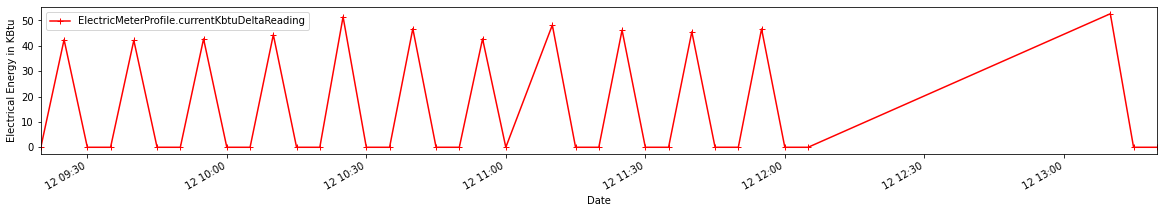

In [15]:
# In case we want to plot the "Electrical Energy" for the small section of data we just created
# plot the columns
dp.dataframeplot(df_new[['ElectricMeterProfile.currentKbtuDeltaReading']],
                 style='r+-',  # plot with red line and annotate points with '+' symbol and connect themby straight lines
                 xlabel='Date',
                 ylabel='Electrical Energy in KBtu',
                 lazy=False,
                 legend=True)